# Bernoulli distribution 

The Bernoulli distribution is a discrete probability distribution that describes the probability of a single experiment having only two possible outcomes:

* **Success** (usually denoted as 1)
* **Failure** (usually denoted as 0)

### Key Points

* It models a single trial.
* The outcome is binary (two possibilities).
* It is characterized by one parameter:
    * p: The probability of success.
    * The probability of failure is q = 1 - p.

### Probability Mass Function (PMF)

The probability of getting a particular outcome is given by the PMF:

$$ P(X = x) =
\begin{cases}
p, & \text{if } x = 1 \text{ (success)} \\
1 - p, & \text{if } x = 0 \text{ (failure)}
\end{cases}
$$

This can also be written as:

$$ P(X = x) = p^x (1-p)^{(1-x)}, \text{ for } x \in \{0, 1\} $$

### Examples

* Tossing a coin:
    * Success = getting heads (1)
    * Failure = getting tails (0)
* Answering a true/false question:
    * Success = answering correctly (1)
    * Failure = answering incorrectly (0)
* A medical test:
    * Success = positive result (1)
    * Failure = negative result (0)

### Relationship to other distributions

* It is a special case of the binomial distribution where the number of trials is 1.


# Binomial Distribution

- The binomial distribution is a discrete probability distribution that describes the probability of obtaining a certain number of successes in a fixed number of independent Bernoulli trials.

**Key Points:**

- It models the number of successes in a fixed number (n) of trials.
- Each trial is independent.
- Each trial has only two possible outcomes: success or failure.
- The probability of success (p) is constant across all trials.
- It is used in hypothesis testing,logistic regression and binary classification problems

**Parameters:**

- n: The number of trials.
- p: The probability of success in each trial.

**Probability Mass Function (PMF):**

- The probability of getting exactly k successes in n trials is given by the PMF:

$$ P(X = k) = {n \choose k} p^k (1-p)^{(n-k)} $$

where ${n \choose k}$ is the binomial coefficient, calculated as:

$$ {n \choose k} = \frac{n!}{k!(n-k)!} $$

**Where:**

- X is the random variable representing the number of successes.
- k is the number of successes (0, 1, 2, ..., n).
- n! is the factorial of n (e.g., 5! = 5 x 4 x 3 x 2 x 1).

**Examples:**

- Tossing a coin 10 times and counting the number of heads.
- Rolling a die 5 times and counting the number of times a "6" appears.
- Testing 100 light bulbs and counting the number of defective ones.

**Relationship to Bernoulli Distribution:**

- The binomial distribution is a generalization of the Bernoulli distribution.
- When n = 1, the binomial distribution is the same as the Bernoulli distribution.

In [58]:
import math

def binomial_probability(n, k, p):
    """
    Calculates the binomial probability.

    Args:
        n: The number of trials.
        k: The number of successes.
        p: The probability of success in each trial.

    Returns:
        The probability of getting exactly k successes in n trials.
    """
    if k < 0 or k > n:
        return 0

    def factorial(num):
        if num == 0:
            return 1
        else:
            result = 1
            for i in range(1, num + 1):
                result *= i
            return result

    binomial_coefficient = factorial(n) / (factorial(k) * factorial(n - k))
    probability = binomial_coefficient * (p ** k) * ((1 - p) ** (n - k))
    return probability

# Example usage:
n = 3  # Number of trials
k = 3  # Number of successes
p = 0.5 # Probability of success

probability = binomial_probability(n, k, p)
print(f"The probability of getting {k} successes in {n} trials is: {probability}")


The probability of getting 3 successes in 3 trials is: 0.125


# Binomial Distribution Rules:

- Fixed trials (n): You know how many times.
- Independent trials: Each trial doesn't affect others.
- Two outcomes: Success or failure.
- Constant success probability (p): The chance of success is the same each time.

**Sampling Distribution**

A sampling distribution is the probability distribution of a sample statistic calculated from repeated samples of the same size drawn from a population.

**Key Concepts:**

* **Population:** The entire group you're interested in.
* **Sample:** A subset of the population.
* **Statistic:** A value calculated from a sample (e.g., sample mean, sample proportion).
* **Sampling Distribution:** The distribution of the statistic when computed from many samples.
* By having various means of different samples it helps to undetstand the data better

**Purpose:**

* To understand how sample statistics vary.
* To make inferences about population parameters.
* Fundamental for hypothesis testing and confidence intervals.
* Central Limit Theorem: Under certain conditions sample distributions will tend to be normally distributed.

**Example:**

* Sampling distribution of the sample mean: The distribution of the means of many samples taken from a population.

**Sampling Distribution Use Cases:**

- Hypothesis testing: Is a claim about the population true?
- Confidence intervals: What's the likely range of the population value?
- Quality control: Is the production process consistent?
- Market/Medical/Political research: Analyzing sample data to understand the broader population.
- Financial/Environmental analysis: Assessing risk, trends, and environmental changes.

# Central Limit Theorem (CLT)
- The central limit theorem (CLT) states that the distribution of sample means approximates a normal distribution as the sample size gets larger, regardless of the population's distribution.
- A sufficiently large sample size can predict the characteristics of a population more accurately.
- Sample sizes equal to or greater than 30 are often considered sufficient for the CLT to hold.
- A key aspect of CLT is that the average of the sample means and standard deviations will equal the population mean and standard deviation.
- CLT is useful in finance and investing when analyzing a large collection of securities to estimate portfolio distributions and traits for returns, risk, and correlation.
- Irrespective of distribution if the samples size is > 30 and for n trails your final distribution will be normal distribution

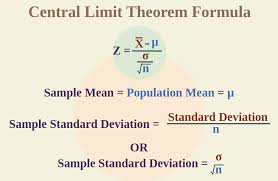

<img src = "">

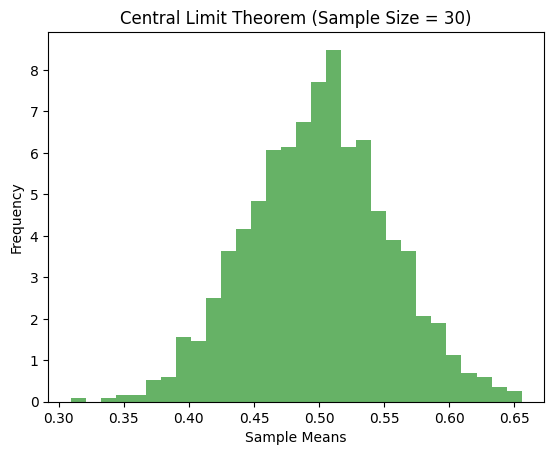

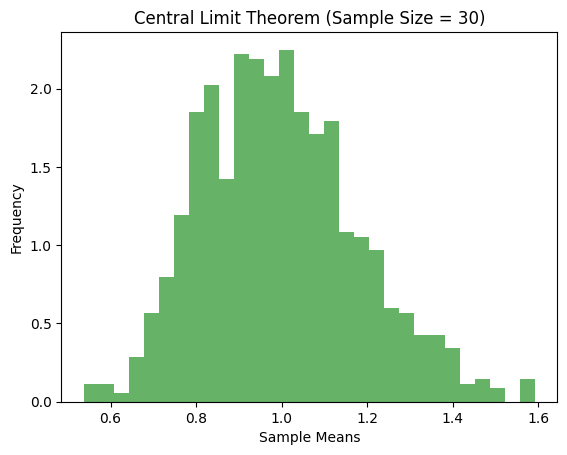

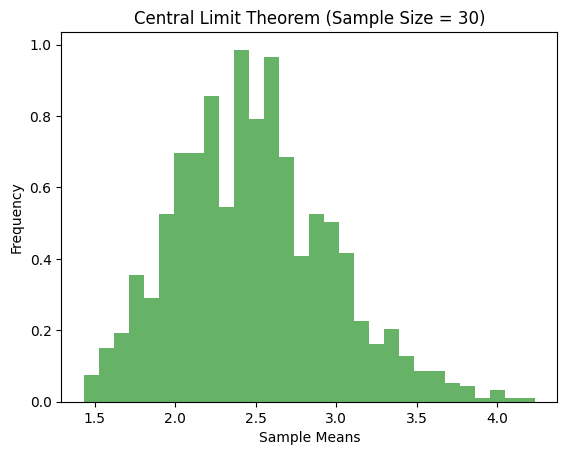

In [59]:
import numpy as np
import matplotlib.pyplot as plt

def central_limit_theorem_demo(population_distribution, sample_size, num_samples):
    """
    Demonstrates the Central Limit Theorem.

    Args:
        population_distribution: A function that generates samples from the population.
        sample_size: The size of each sample.
        num_samples: The number of samples to generate.
    """

    sample_means = []
    for _ in range(num_samples):
        sample = population_distribution(sample_size)
        sample_means.append(np.mean(sample))

    # Plotting the distribution of sample means
    plt.hist(sample_means, bins=30, density=True, alpha=0.6, color='g')
    plt.title(f"Central Limit Theorem (Sample Size = {sample_size})")
    plt.xlabel("Sample Means")
    plt.ylabel("Frequency")
    plt.show()

# Example 1: Uniform distribution
def uniform_distribution(size):
    return np.random.uniform(0, 1, size)

central_limit_theorem_demo(uniform_distribution, sample_size=30, num_samples=1000)

# Example 2: Exponential distribution
def exponential_distribution(size):
    return np.random.exponential(1, size) # rate = 1

central_limit_theorem_demo(exponential_distribution, sample_size=30, num_samples=1000)

#Example 3: a custom distribution
def skewed_distribution(size):
  return np.random.choice([1,2,3,4,10], size=size, p=[0.6,0.1,0.1,0.1,0.1])
central_limit_theorem_demo(skewed_distribution, sample_size=30, num_samples=1000)

In [62]:
import seaborn as sns 
import pandas as pd
import numpy as np
from matplotlib import pyplot as pl
titanic =  sns.load_dataset('titanic')

titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


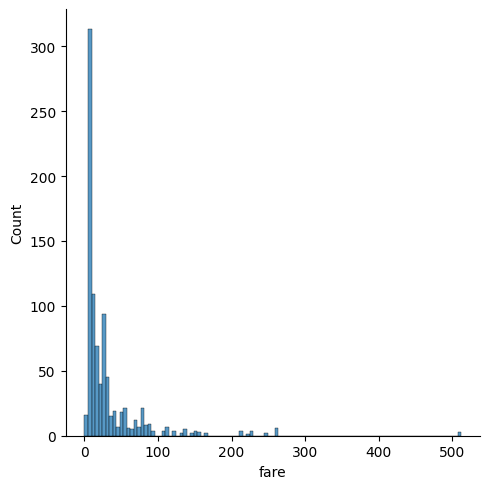

In [73]:
sns.displot(titanic['fare'])


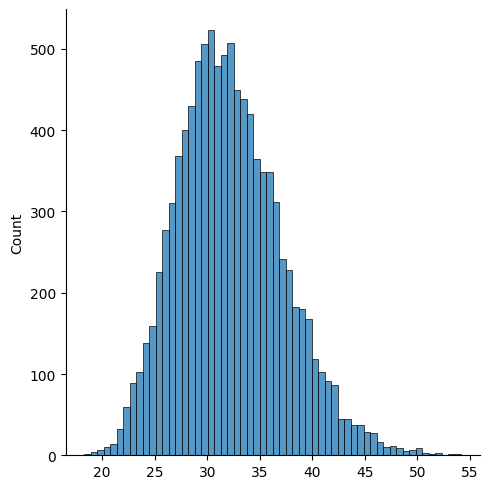

In [71]:
#From above you can clearly see its not following normal so lets apply clt
samples = []
for i in range(10000):
    
    samples.append(np.random.choice(titanic['fare'],size=100).mean())

sns.displot(samples)


In [77]:
print('Samples Mean',np.array(samples).mean())
print('Population Mean',titanic['fare'].mean())

Samples Mean 32.1829839083
Population Mean 32.204207968574636
